### Linear discriminant analysis (LDA) is a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification.

### Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes theorem with strong (naive) independence assumptions between the features.

### Importing Libraries

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### Importing Wine Data Set

#### The data set contains various predictors like fixed acidity, volatile acidity, density, pH etc to identify the quality of wine

In [6]:
#Loading data set into my_data
wine_data = pd.read_csv("C:/Users/samid/Desktop/course/ML & Stat/red-wine-quality/winequality-red.csv", low_memory =False)

#Reading the first 5 enteries of the data set
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
wine_data.shape

(1599, 12)

In [33]:
print (wine_data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

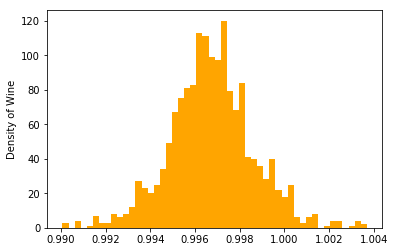

In [29]:
#Plot the dataset with Density of wine 

plt.hist(wine_data.density,bins=50, color = 'orange' )
plt.ylabel('Density of Wine')
plt.show()

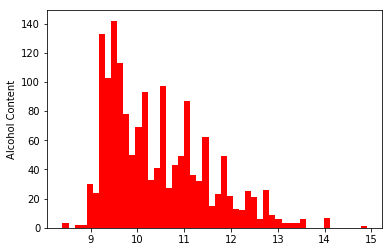

In [76]:
#Plot the dataset with Density of wine 

plt.hist(wine_data.alcohol,bins=50, color = 'red' )
plt.ylabel('Alcohol Content')
plt.show()

#### Predictors and Response

In [9]:
# Reading all predictors in x
wine_predictor = np.array(wine_data.ix[:,0:11])

# Loading response in y
wine_qlty = np.array(wine_data['quality'])

In [43]:
max(wine_predictor[:,0])

15.9

In [11]:
wine_qlty

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

#### Splitting the data in test and train

In [16]:
#X_train,y_train for training and X_Test, y_test for testing
# Using 20% of data set for testing
X_train, X_test, y_train, y_test = train_test_split(wine_predictor,wine_qlty, test_size=0.20, random_state =42)

### LDA

In [20]:
# %% Data extracted; perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
k_fold = cross_validation.KFold(len(X_train), 3, shuffle=True)
print('LDA Results: ')

for (trn, tst) in k_fold:
    lda.fit(X_train, y_train)
    outVal = lda.score(X_train, y_train)
    
#Compute classification error
print('Score: ' + str(outVal))

LDA Results: 
Score: 0.615324472244


#### NAIVE BAYES

In [22]:
#Create a Gaussian Classifier
naive = GaussianNB()

# Train the model using the training sets
naive.fit(X_train, y_train)

GaussianNB(priors=None)

In [24]:
# Predicting the Test set results
y_pred = naive.predict(X_test)
y_pred

array([5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 7, 5, 6, 5, 5, 7, 5, 6, 7, 5, 5, 5, 6,
       6, 5, 6, 7, 6, 5, 7, 5, 6, 6, 5, 6, 5, 7, 6, 6, 6, 6, 5, 7, 5, 6, 6,
       7, 6, 5, 6, 5, 4, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 7, 6, 7, 6, 7,
       5, 7, 5, 6, 6, 6, 5, 7, 5, 6, 7, 6, 7, 5, 6, 6, 7, 5, 6, 7, 5, 6, 5,
       6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 7, 5, 5, 5, 6,
       6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 7, 6, 5, 5, 5,
       5, 6, 7, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7,
       5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5, 6, 6, 5, 5, 4, 5, 7, 5, 7,
       5, 7, 5, 6, 7, 5, 5, 7, 6, 7, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 5,
       6, 6, 5, 6, 5, 6, 6, 7, 6, 4, 5, 6, 5, 5, 7, 7, 6, 4, 5, 5, 7, 5, 6,
       5, 5, 7, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 7, 4, 6, 6, 5, 8, 5, 6, 6, 5,
       5, 3, 5, 5, 6, 6, 7, 7, 6, 5, 7, 6, 7, 5, 5, 7, 7, 5, 6, 5, 5, 6, 6,
       5, 6, 7, 5, 7, 5, 5, 6, 5, 6, 5, 6, 5, 4, 5, 7, 8, 5, 5, 7, 5, 7, 6,
       7, 6,

#### Accuracy of Naive Bias

In [25]:
from sklearn.metrics import accuracy_score
#accuarcy of classifier
accuracy_score(y_test, y_pred)

0.55000000000000004

### Conclusion:

#### Hence, we can say that in this case the LDA classfier perform better.